# Indexing and Selecting Data in GeoPandas

This notebook demonstrates various methods for selecting data from a GeoDataFrame, from standard Pandas indexers to specialized spatial indexers.

## 1. Setup and Imports

First, let's import the necessary libraries.

In [20]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

## 2. Standard Indexing with `.loc` and `.iloc`

GeoPandas supports the standard Pandas indexers for selecting data by row number (`.iloc`) or index label (`.loc`).

In [21]:
# Create a sample GeoDataFrame
data = {'city': ['Denver', 'Phoenix', 'Austin', 'Boston'],
        'population': [715522, 1608139, 961855, 675647],
        'geometry': [Point(-104.99, 39.74), Point(-112.07, 33.45), Point(-97.74, 30.27), Point(-71.06, 42.36)]}
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

print("Original GeoDataFrame:")
print(gdf)

# Select the first 3 rows using .iloc
first_three = gdf.iloc[0:3]
print("First 3 rows selected with .iloc:")
print(first_three)

Original GeoDataFrame:
      city  population               geometry
0   Denver      715522  POINT (-104.99 39.74)
1  Phoenix     1608139  POINT (-112.07 33.45)
2   Austin      961855   POINT (-97.74 30.27)
3   Boston      675647   POINT (-71.06 42.36)
First 3 rows selected with .iloc:
      city  population               geometry
0   Denver      715522  POINT (-104.99 39.74)
1  Phoenix     1608139  POINT (-112.07 33.45)
2   Austin      961855   POINT (-97.74 30.27)


## 3. Attribute-based Selection

This is the most common way to select data: filtering based on the values in one or more columns.

Cities with population > 1 million:
      city  population               geometry
1  Phoenix     1608139  POINT (-112.07 33.45)


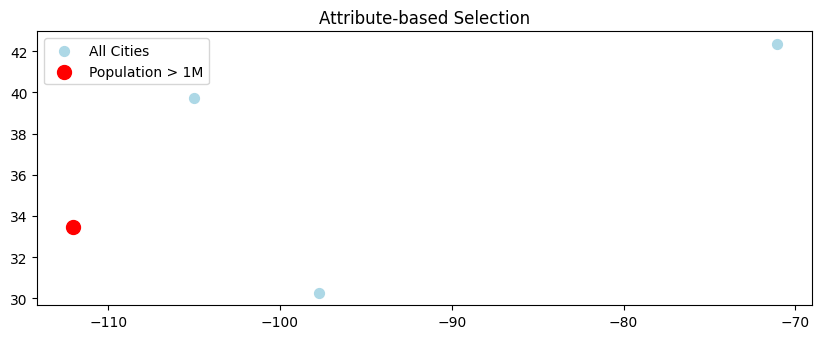

In [22]:
# Select all cities with a population greater than 1 million
high_population = gdf[gdf['population'] > 1000000]

print("Cities with population > 1 million:")
print(high_population)

# Let's visualize this selection
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot all cities in a light color
gdf.plot(ax=ax, color='lightblue', markersize=50, label='All Cities')

# Plot the selected cities in a different color
high_population.plot(ax=ax, color='red', markersize=100, label='Population > 1M')

plt.title('Attribute-based Selection')
plt.legend()
plt.show()

## 4. Spatial Indexing with `.cx`

The `.cx` indexer is a GeoPandas specialty, optimized for selecting geometries that intersect with a given bounding box. It provides a concise and efficient way to perform spatial queries.

The syntax is `gdf.cx[xmin:xmax, ymin:ymax]`.

Selected countries:
0                          Aruba
8                      Argentina
31                       Bolivia
32                        Brazil
33                      Barbados
40                         Chile
47                      Colombia
50                    Costa Rica
52                       Curaçao
63                       Ecuador
71                  Falkland Is.
72                        France
85                       Grenada
87                     Guatemala
89                        Guyana
92                      Honduras
125                  Saint Lucia
159                    Nicaragua
161                  Netherlands
168                       Panama
170                         Peru
178                     Paraguay
191    S. Geo. and S. Sandw. Is.
195                  El Salvador
202                     Suriname
218          Trinidad and Tobago
225                      Uruguay
229           St. Vin. and Gren.
230                    Venezuela
Name: name, dtype: obje

C:\Users\priti\AppData\Local\Temp\ipykernel_12640\2778886738.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\priti\AppData\Local\Temp\ipykernel_12640\2778886738.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


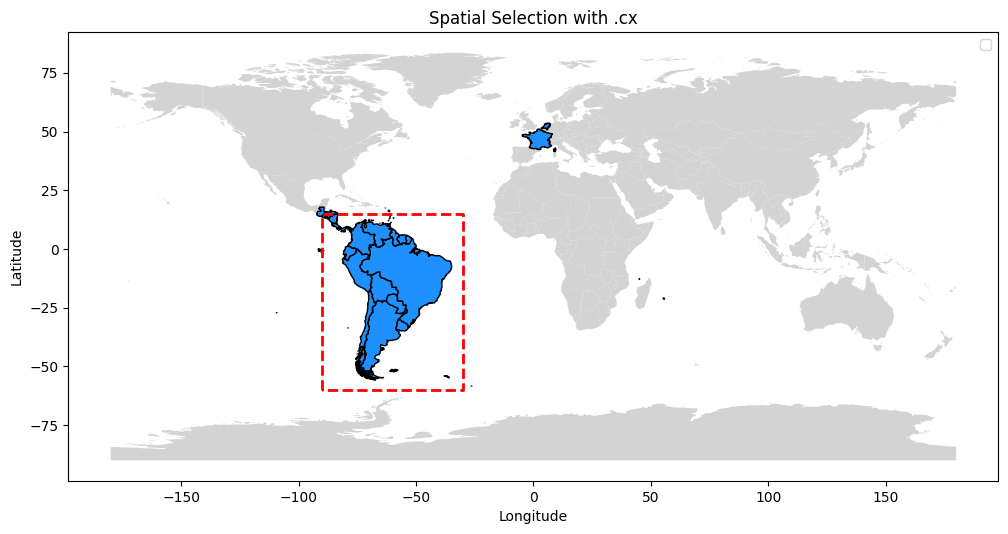

In [25]:
# Let's use a different GeoDataFrame for this example
world = gpd.read_file("countries.geojson")

# Define a bounding box for South America
xmin, xmax = -90, -30
ymin, ymax = -60, 15

# Use .cx to select countries within this bounding box
selection = world.cx[xmin:xmax, ymin:ymax]

print("Selected countries:")
print(selection['name'])

# Visualize the spatial selection
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the whole world
world.plot(ax=ax, color='lightgray')

# Plot the selected area
selection.plot(ax=ax, color='dodgerblue', edgecolor='black')

# Draw the bounding box
bbox = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])
gpd.GeoSeries([bbox]).plot(ax=ax, color='none', edgecolor='red', linestyle='--', linewidth=2, label='Bounding Box')

ax.set_title('Spatial Selection with .cx')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.show()